In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [6]:
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (13,9)
plt.rcParams['font.size'] = 20
warnings.filterwarnings('ignore')

In [8]:
binary_data = pd.read_csv('/IV.csv')

In [9]:
binary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 4 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Time                                 6000 non-null   float64
 1   Subsystem #1|Branch Currents|MAINIA  6000 non-null   float64
 2   Subsystem #1|Branch Currents|MAINIB  6000 non-null   float64
 3   Subsystem #1|Branch Currents|MAINIC  6000 non-null   float64
dtypes: float64(4)
memory usage: 187.6 KB


In [10]:
binary_data.head()

,Time,Subsystem #1|Branch Currents|MAINIA,Subsystem #1|Branch Currents|MAINIB,Subsystem #1|Branch Currents|MAINIC
0,0.000000,-0.108405,0.052671,0.039374
1,0.000167,-0.108092,0.040207,0.050244
2,0.000333,-0.107282,0.027569,0.060860
3,0.000500,-0.105984,0.014821,0.071172
4,0.000667,-0.104211,0.002025,0.081135


In [11]:
any(binary_data.isna().sum() > 0)

False

In [13]:
print(f'Number of Samples: {binary_data.shape[0]}\nNumber of Features: {binary_data.shape[1]}')

Number of Samples: 6000
Number of Features: 4


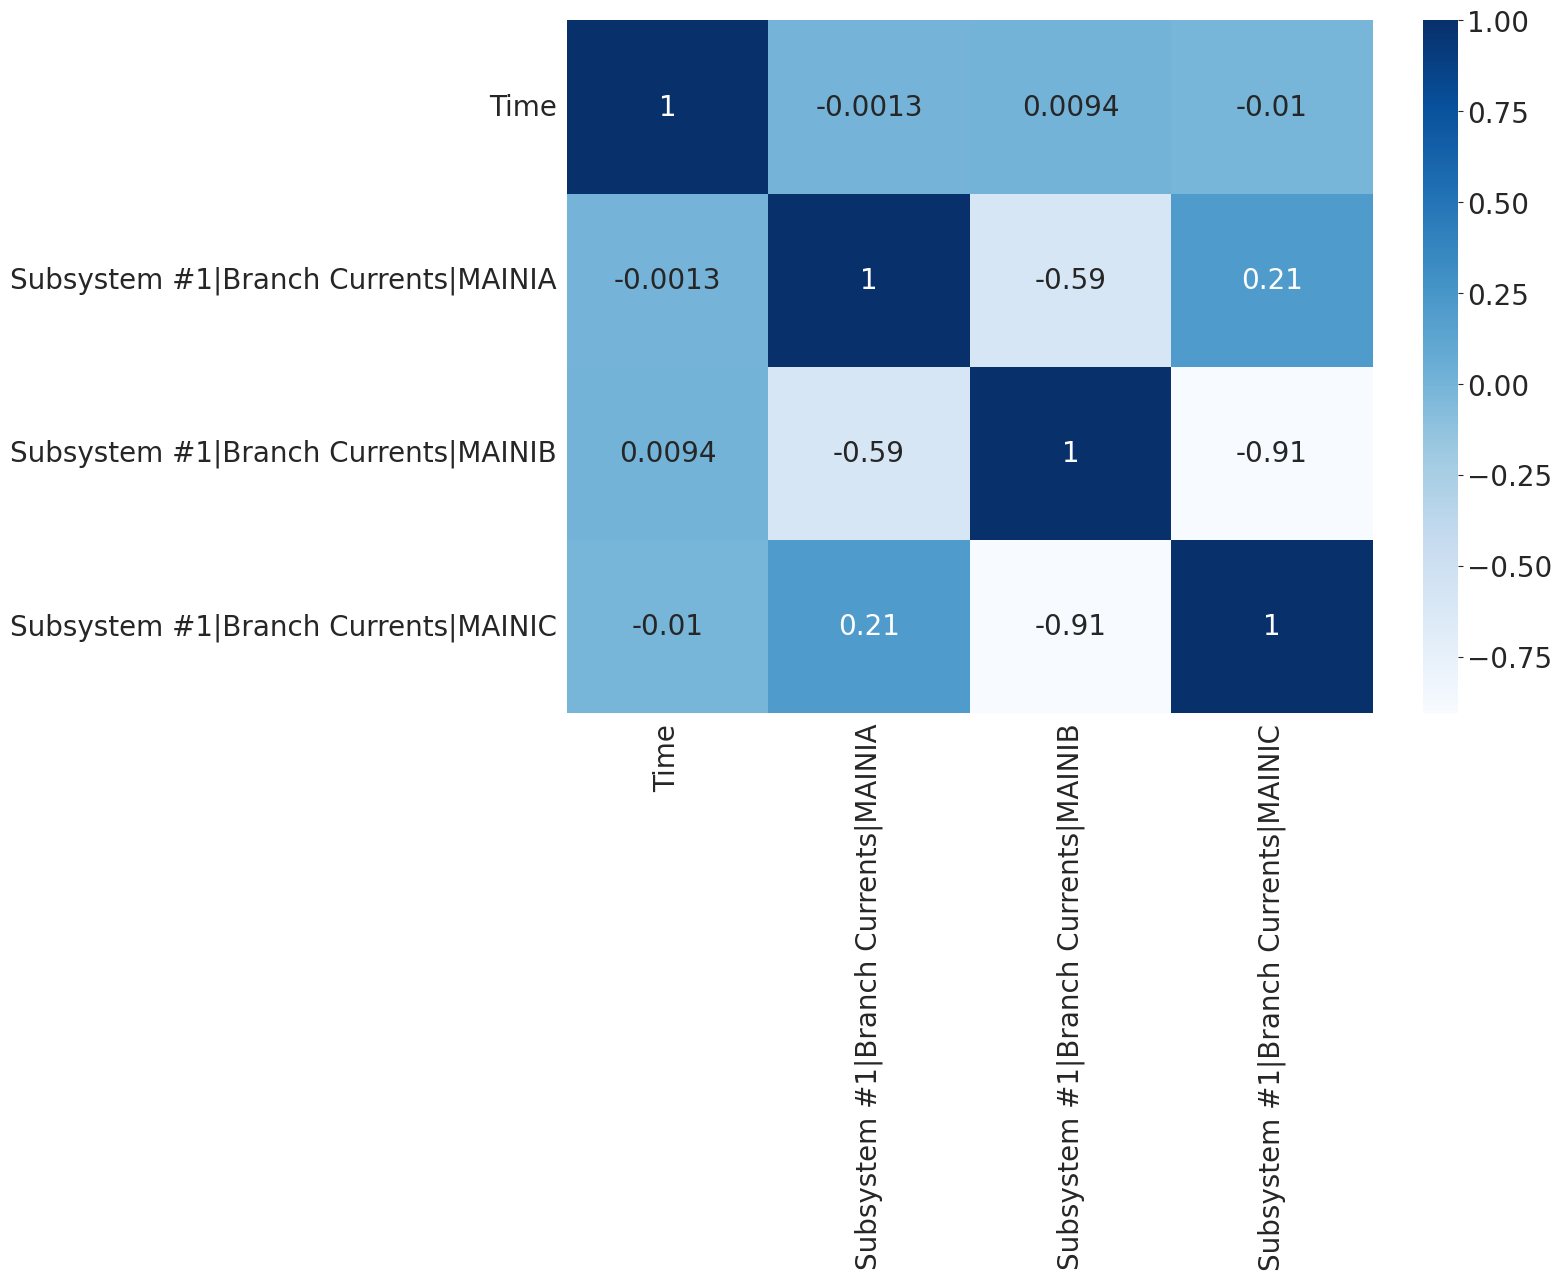

In [14]:
sns.heatmap(binary_data.corr(), annot=True, cmap='Blues')
plt.show()

In [15]:
plt.figure(figsize=(25,6))

<Figure size 2500x600 with 0 Axes>

<Figure size 2500x600 with 0 Axes>

Text(0, 0.5, 'Time')

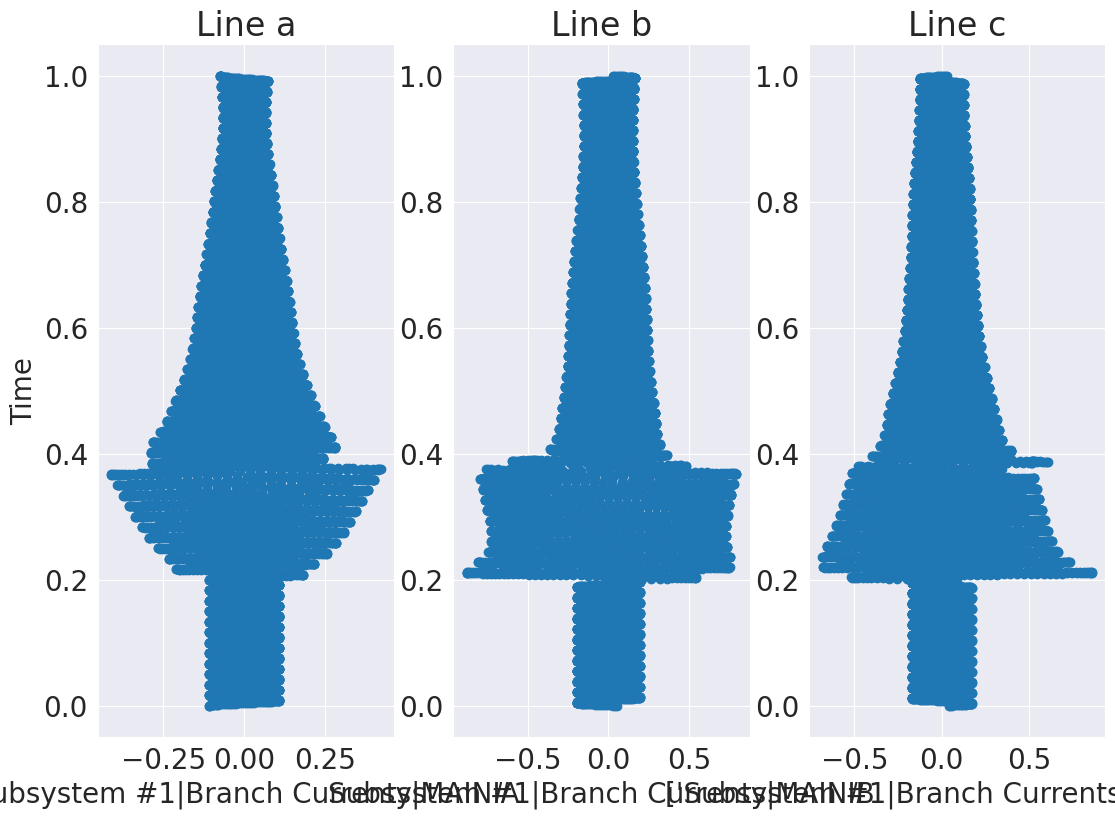

In [17]:
a1 = plt.subplot2grid((1,3),(0,0))
a1.scatter(binary_data['Subsystem #1|Branch Currents|MAINIA'], binary_data['Time'])
a1.set_title('Line a')
a1.set_xlabel('Subsystem #1|Branch Currents|MAINIA')
a1.set_ylabel('Time')

a2 = plt.subplot2grid((1,3),(0,1))
a2.scatter(binary_data['Subsystem #1|Branch Currents|MAINIB'], binary_data['Time'])
a2.set_title('Line b')
a2.set_xlabel('Subsystem #1|Branch Currents|MAINIB')
a1.set_ylabel('Time')


a3 = plt.subplot2grid((1,3),(0,2))
a3.scatter(binary_data['Subsystem #1|Branch Currents|MAINIC'], binary_data['Time'])
a3.set_title('Line c')
a3.set_xlabel(['Subsystem #1|Branch Currents|MAINIC'])
a1.set_ylabel('Time')



In [22]:
import matplotlib.pyplot as plt

# Assuming binary_data is a DataFrame with a column named 'Time'

time_counts = binary_data['Time'].value_counts()

# Check if there are exactly two unique values in the 'Time' column
if len(time_counts) == 2:
    plt.pie(x=time_counts, labels=time_counts.index,
            explode=[0.2, 0.4], autopct='%1.1f%%', labeldistance=1.15,
            colors=['#0c06c7', '#05daed'])
    plt.show()
else:
    print("The 'Time' column must have exactly two unique values for the pie chart.")


The 'Time' column must have exactly two unique values for the pie chart.


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [24]:
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (13,9)
plt.rcParams['font.size'] = 20
warnings.filterwarnings('ignore')

In [25]:
binary_data = pd.read_csv('/detect_dataset.csv')
multi_data = pd.read_csv('/classData.csv')

In [26]:
binary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12001 entries, 0 to 12000
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Output (S)  12001 non-null  int64  
 1   Ia          12001 non-null  float64
 2   Ib          12001 non-null  float64
 3   Ic          12001 non-null  float64
 4   Va          12001 non-null  float64
 5   Vb          12001 non-null  float64
 6   Vc          12001 non-null  float64
 7   Unnamed: 7  0 non-null      float64
 8   Unnamed: 8  0 non-null      float64
dtypes: float64(8), int64(1)
memory usage: 843.9 KB


In [27]:
binary_data.head()

,Output (S),Ia,Ib,Ic,Va,Vb,Vc,Unnamed: 7,Unnamed: 8
0,0,-170.472196,9.219613,161.252583,0.054490,-0.659921,0.605431,NaN,NaN
1,0,-122.235754,6.168667,116.067087,0.102000,-0.628612,0.526202,NaN,NaN
2,0,-90.161474,3.813632,86.347841,0.141026,-0.605277,0.464251,NaN,NaN
3,0,-79.904916,2.398803,77.506112,0.156272,-0.602235,0.445963,NaN,NaN
4,0,-63.885255,0.590667,63.294587,0.180451,-0.591501,0.411050,NaN,NaN


In [28]:
any(binary_data.isna().sum() > 0)

True

In [29]:
multi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7861 entries, 0 to 7860
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   G       7861 non-null   int64  
 1   C       7861 non-null   int64  
 2   B       7861 non-null   int64  
 3   A       7861 non-null   int64  
 4   Ia      7861 non-null   float64
 5   Ib      7861 non-null   float64
 6   Ic      7861 non-null   float64
 7   Va      7861 non-null   float64
 8   Vb      7861 non-null   float64
 9   Vc      7861 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 614.3 KB


In [30]:
multi_data.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983


In [31]:
any(multi_data.isna().sum() > 0)

False

In [32]:
binary_data.drop(binary_data.iloc[:,[7,8]], axis=1, inplace=True)

In [33]:
print(f'Number of Samples: {binary_data.shape[0]}\nNumber of Features: {binary_data.shape[1]}')

Number of Samples: 12001
Number of Features: 7


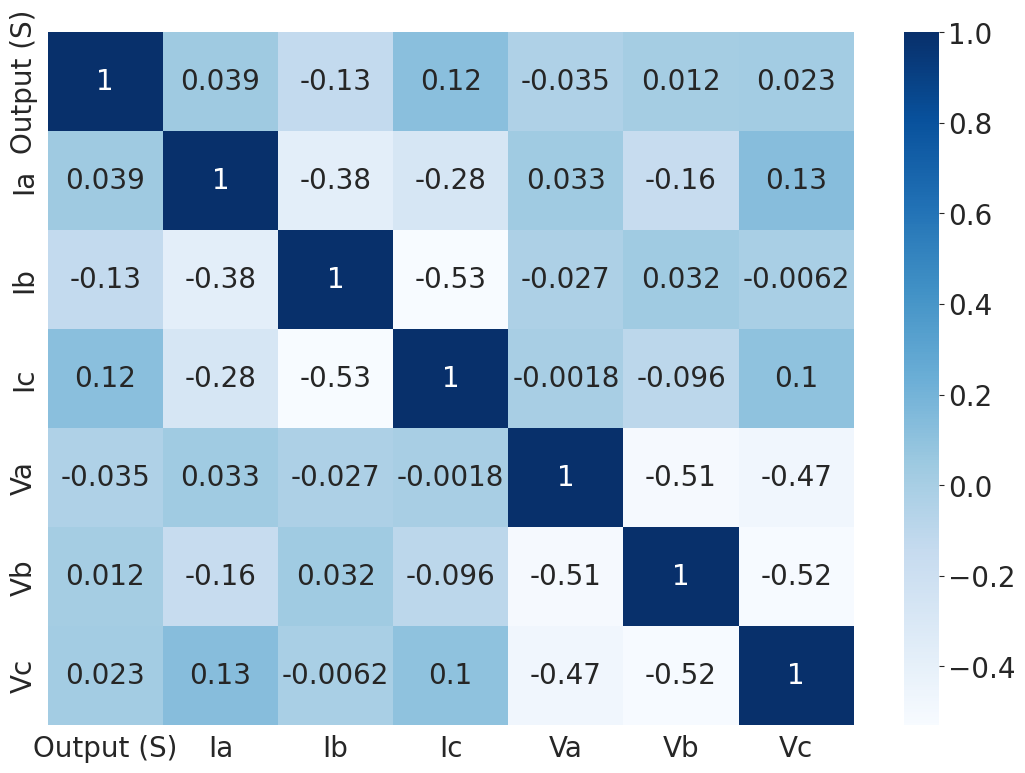

In [34]:
sns.heatmap(binary_data.corr(), annot=True, cmap='Blues')
plt.show()

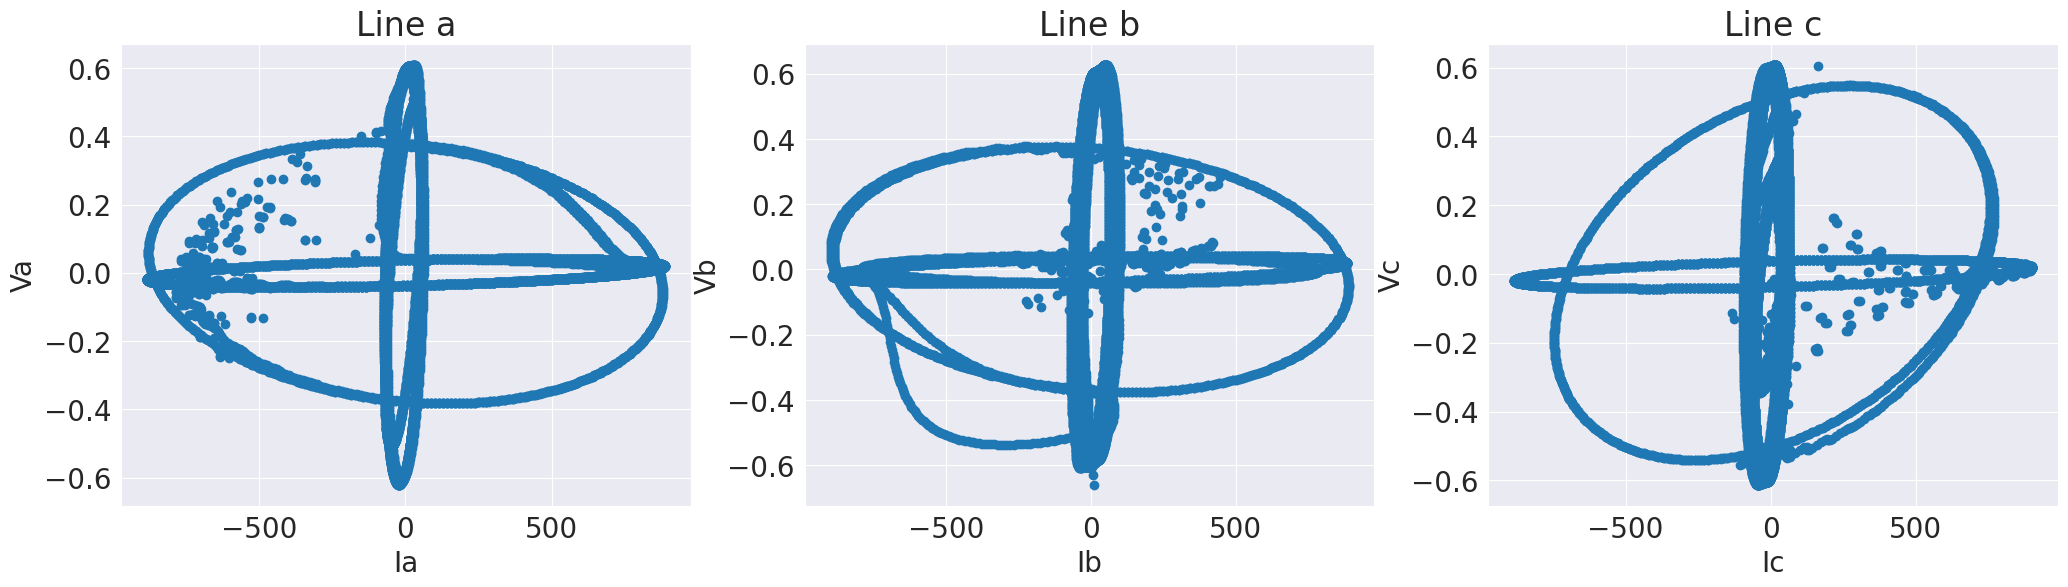

In [35]:
plt.figure(figsize=(25,6))

a1 = plt.subplot2grid((1,3),(0,0))
a1.scatter(binary_data['Ia'], binary_data['Va'])
a1.set_title('Line a')
a1.set_xlabel('Ia')
a1.set_ylabel('Va')

a2 = plt.subplot2grid((1,3),(0,1))
a2.scatter(binary_data['Ib'], binary_data['Vb'])
a2.set_title('Line b')
a2.set_xlabel('Ib')
a2.set_ylabel('Vb')

a3 = plt.subplot2grid((1,3),(0,2))
a3.scatter(binary_data['Ic'], binary_data['Vc'])
a3.set_title('Line c')
a3.set_xlabel('Ic')
a3.set_ylabel('Vc')

plt.show()

In [37]:
def dist(cola,colb):

    fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(18,10))

    sns.distplot(binary_data[cola], label='Line Current', hist=True, color='#fc0328', ax=axs[0])
    sns.distplot(binary_data[colb], label='Line Voltage', hist=True, color='#0c06c7', ax=axs[1])

    axs[0].legend(loc='upper right', prop={'size': 12})
    axs[1].legend(loc='upper right', prop={'size': 12})

    plt.show()

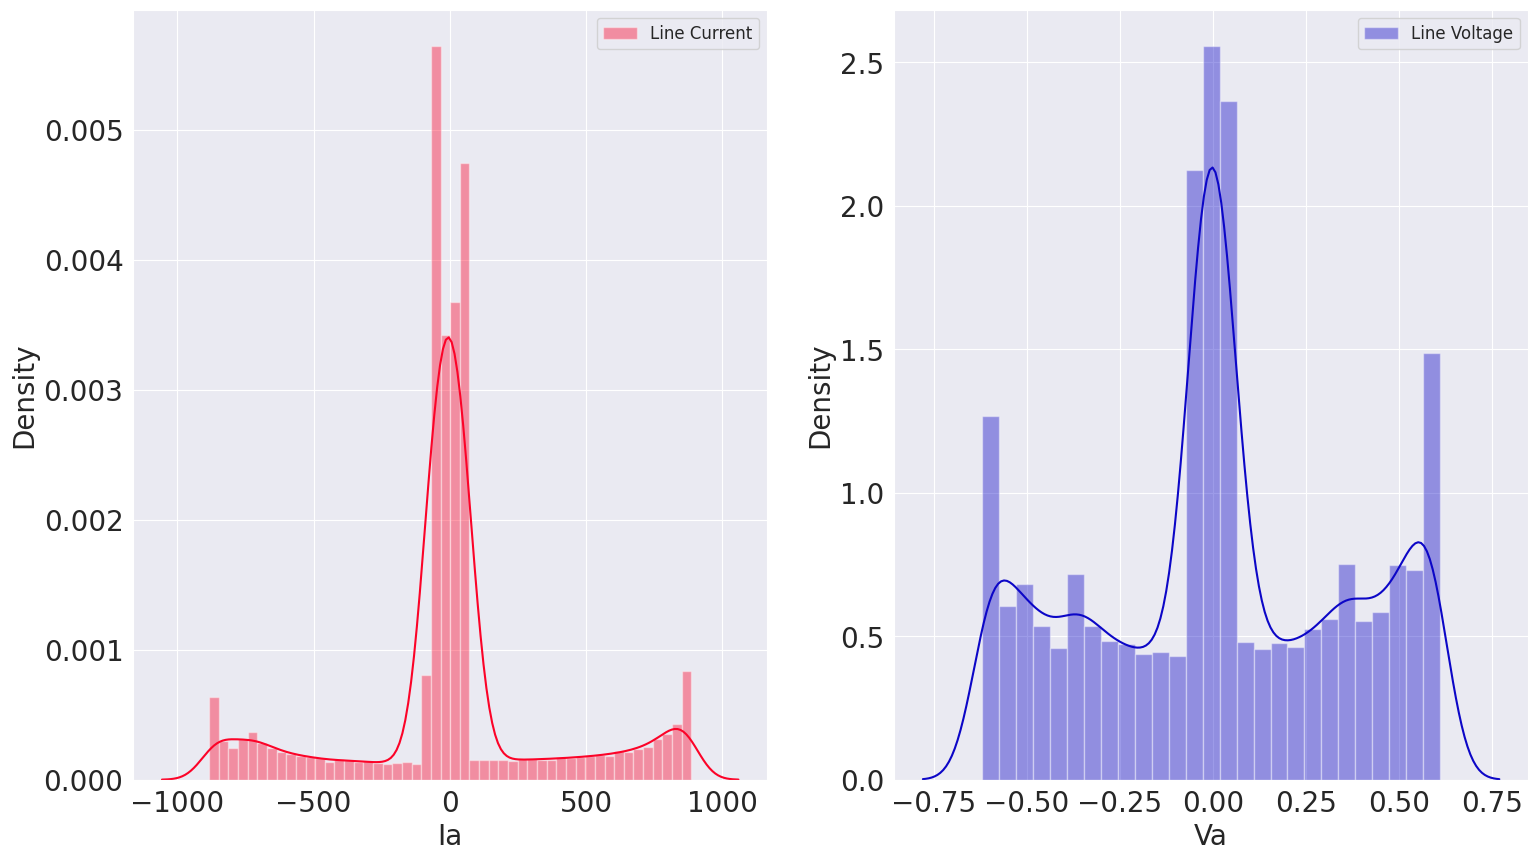

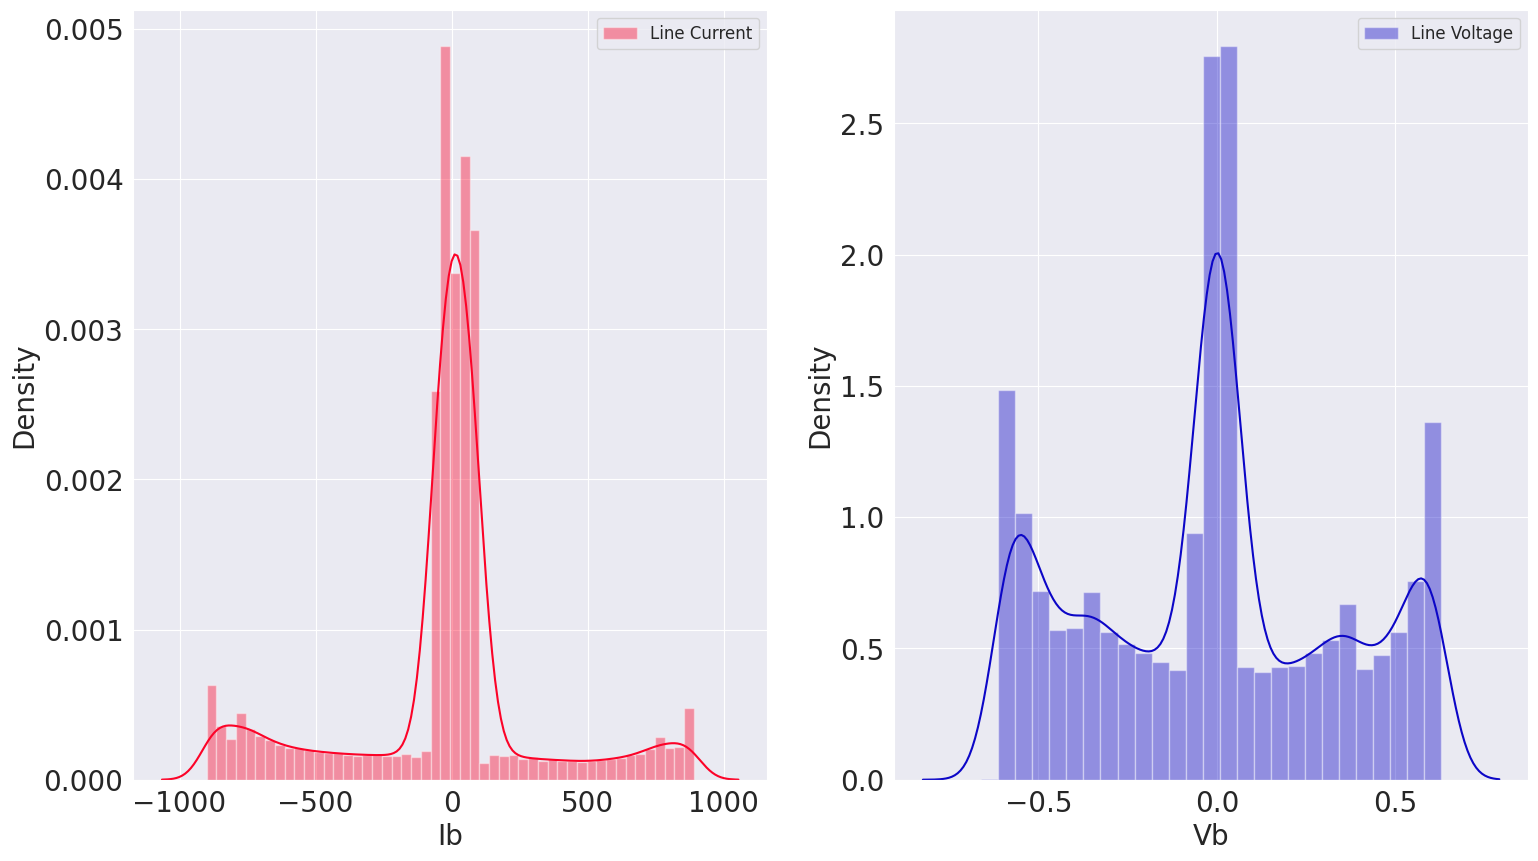

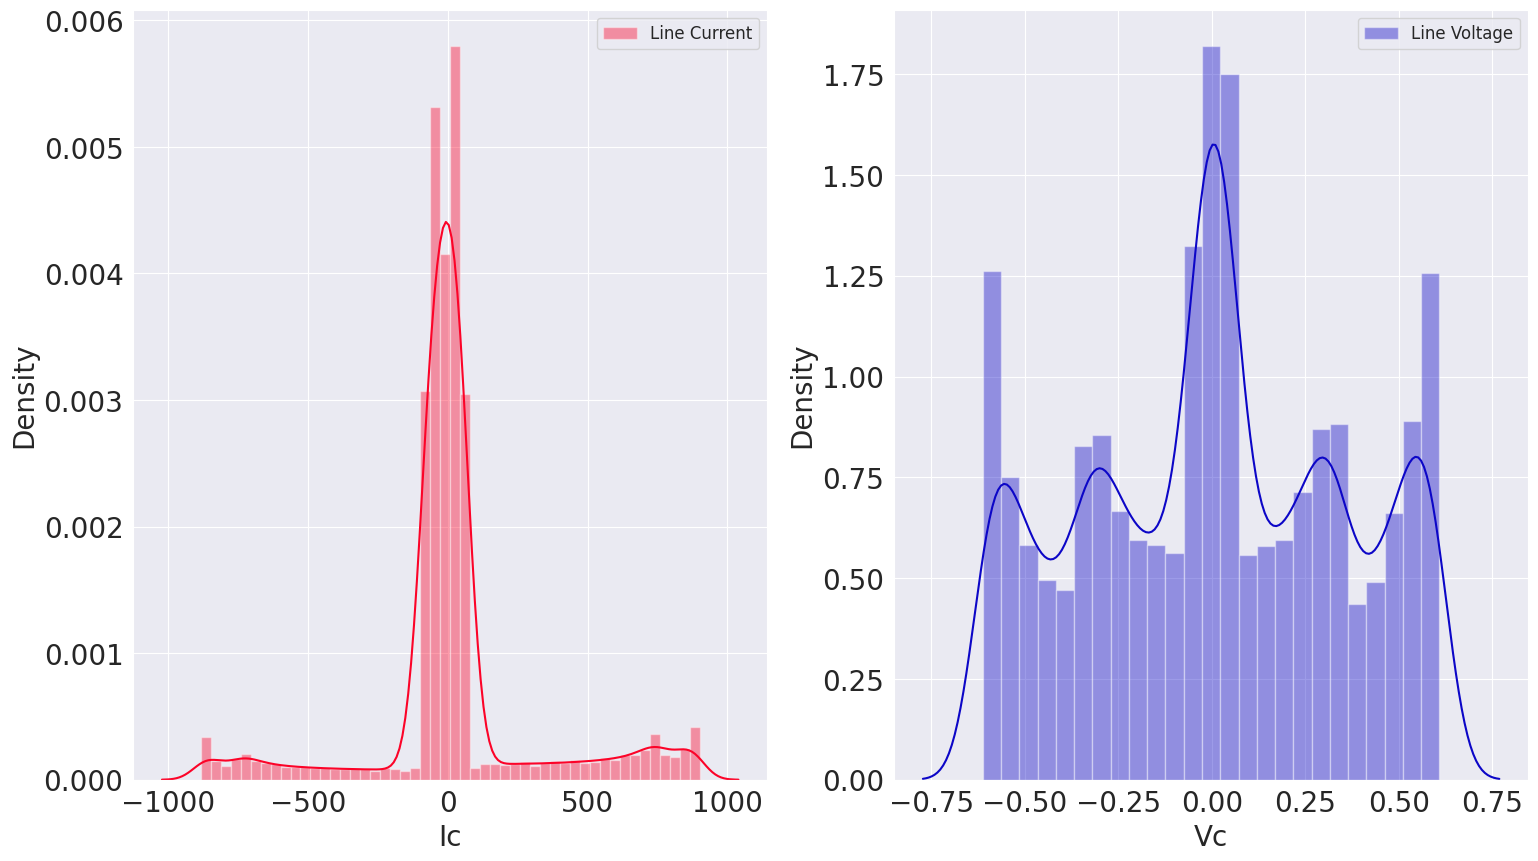

In [38]:
lines = [
    ('Ia', 'Va'),
    ('Ib', 'Vb'),
    ('Ic', 'Vc')
]

for cola,colb in lines:
    dist(cola,colb)
    print('\n')

In [39]:
y = binary_data.iloc[:,0]
X = binary_data.iloc[:,1:7]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9600, 6), (2401, 6), (9600,), (2401,))

In [40]:
model_1 = RandomForestClassifier()
model_1.fit(X_train, y_train)
y_pred = model_1.predict(X_test)

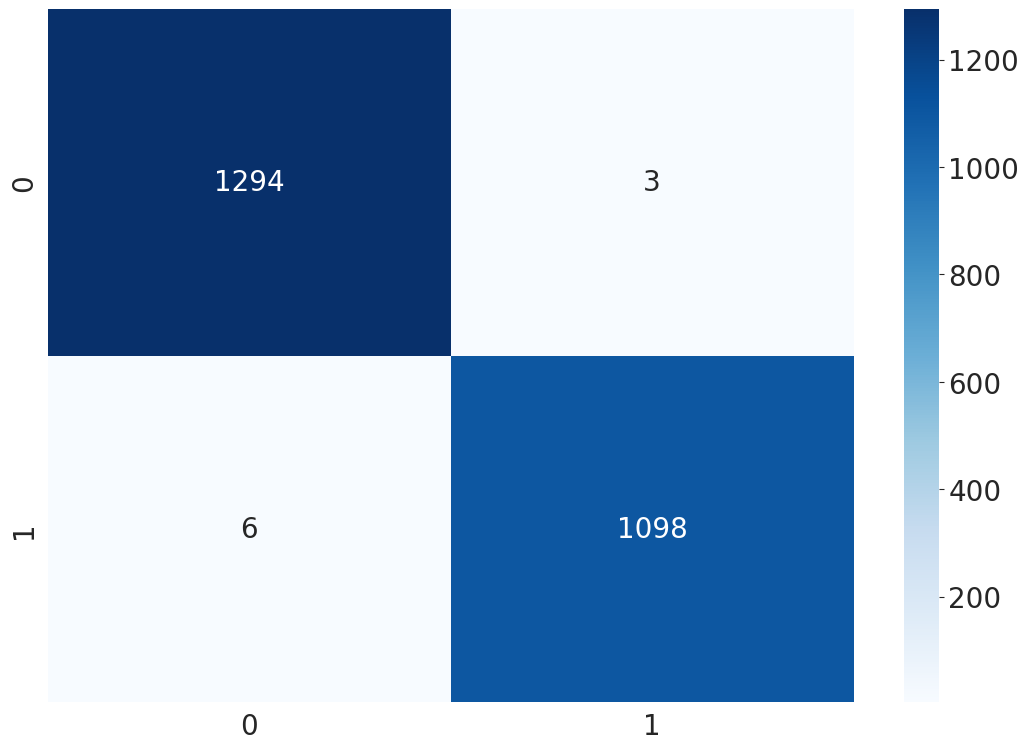

In [41]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='.4g')
plt.show()

In [42]:
print(f'Accuracy Score: {accuracy_score(y_test, y_pred)*100:.03f}%')
print(f'Precision Score: {precision_score(y_test, y_pred)*100:.03f}%')
print(f'Recall Score: {recall_score(y_test, y_pred)*100:.03f}%')

Accuracy Score: 99.625%
Precision Score: 99.728%
Recall Score: 99.457%


In [43]:
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1297
           1       1.00      0.99      1.00      1104

    accuracy                           1.00      2401
   macro avg       1.00      1.00      1.00      2401
weighted avg       1.00      1.00      1.00      2401



In [44]:
print(f'Number of Samples: {multi_data.shape[0]}\nNumber of Features: {multi_data.shape[1]}')

Number of Samples: 7861
Number of Features: 10


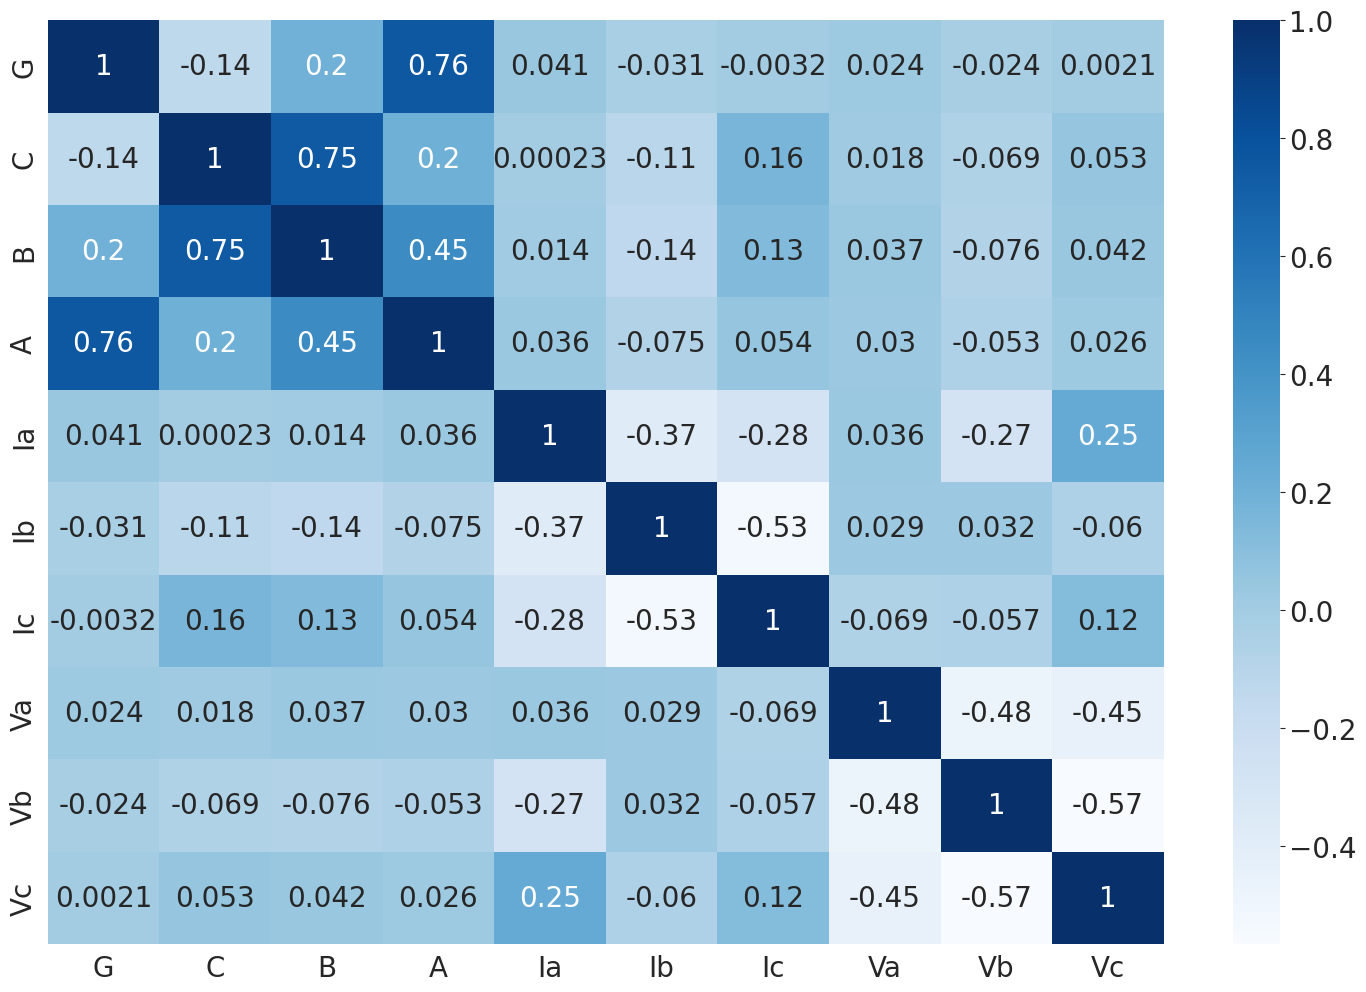

In [45]:
plt.figure(figsize=(18,12))
sns.heatmap(multi_data.corr(), annot=True, cmap='Blues')
plt.show()

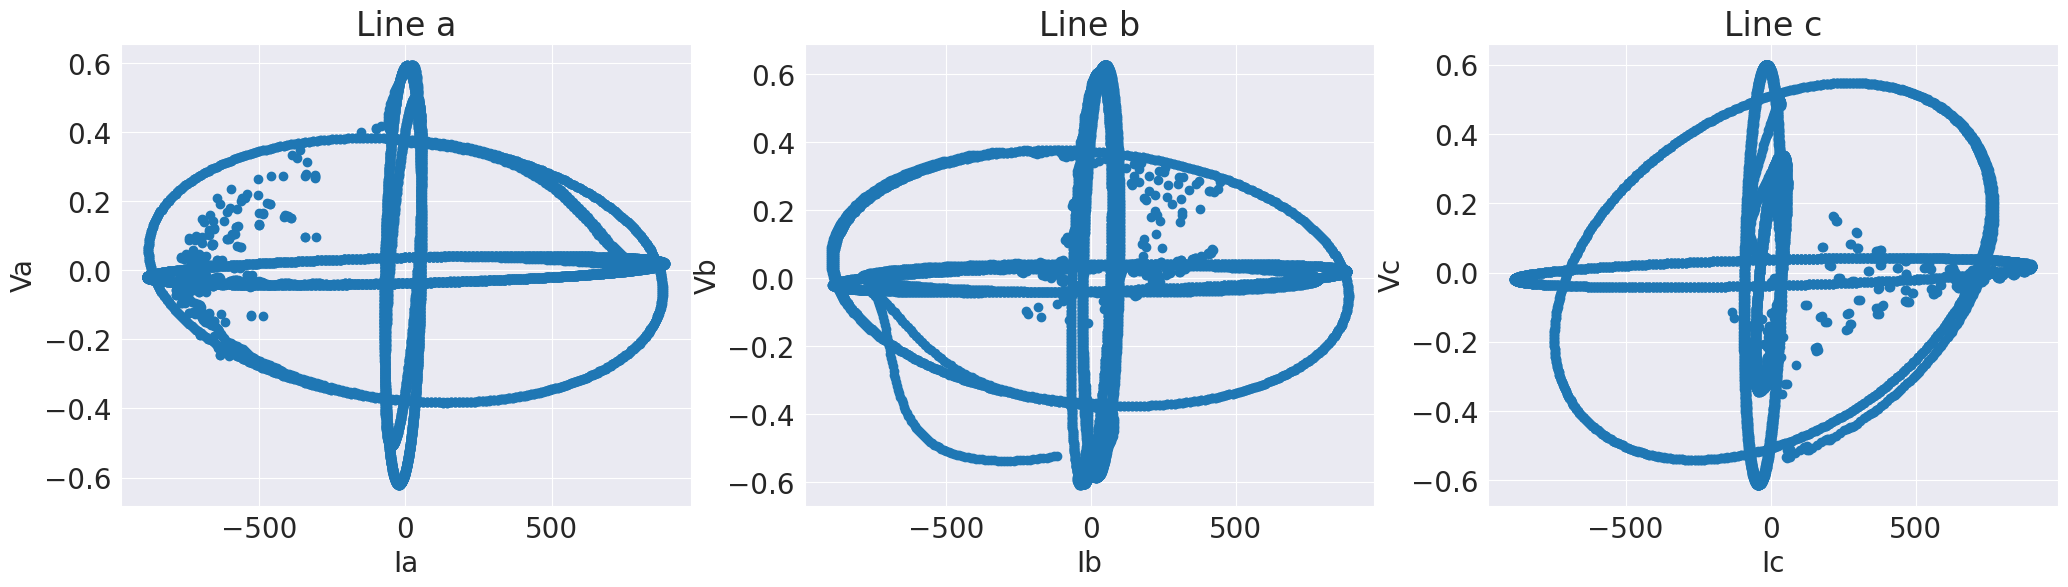

In [46]:
plt.figure(figsize=(25,6))

a1 = plt.subplot2grid((1,3),(0,0))
a1.scatter(multi_data['Ia'], multi_data['Va'])
a1.set_title('Line a')
a1.set_xlabel('Ia')
a1.set_ylabel('Va')

a2 = plt.subplot2grid((1,3),(0,1))
a2.scatter(multi_data['Ib'], multi_data['Vb'])
a2.set_title('Line b')
a2.set_xlabel('Ib')
a2.set_ylabel('Vb')

a3 = plt.subplot2grid((1,3),(0,2))
a3.scatter(multi_data['Ic'], multi_data['Vc'])
a3.set_title('Line c')
a3.set_xlabel('Ic')
a3.set_ylabel('Vc')

plt.show()

In [47]:
def dist(cola,colb):

    fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(18,10))

    sns.distplot(multi_data[cola], label='Line Current', hist=True, color='#fc0328', ax=axs[0])
    sns.distplot(multi_data[colb], label='Line Voltage', hist=True, color='#0c06c7', ax=axs[1])

    axs[0].legend(loc='upper right', prop={'size': 12})
    axs[1].legend(loc='upper right', prop={'size': 12})

    plt.show()

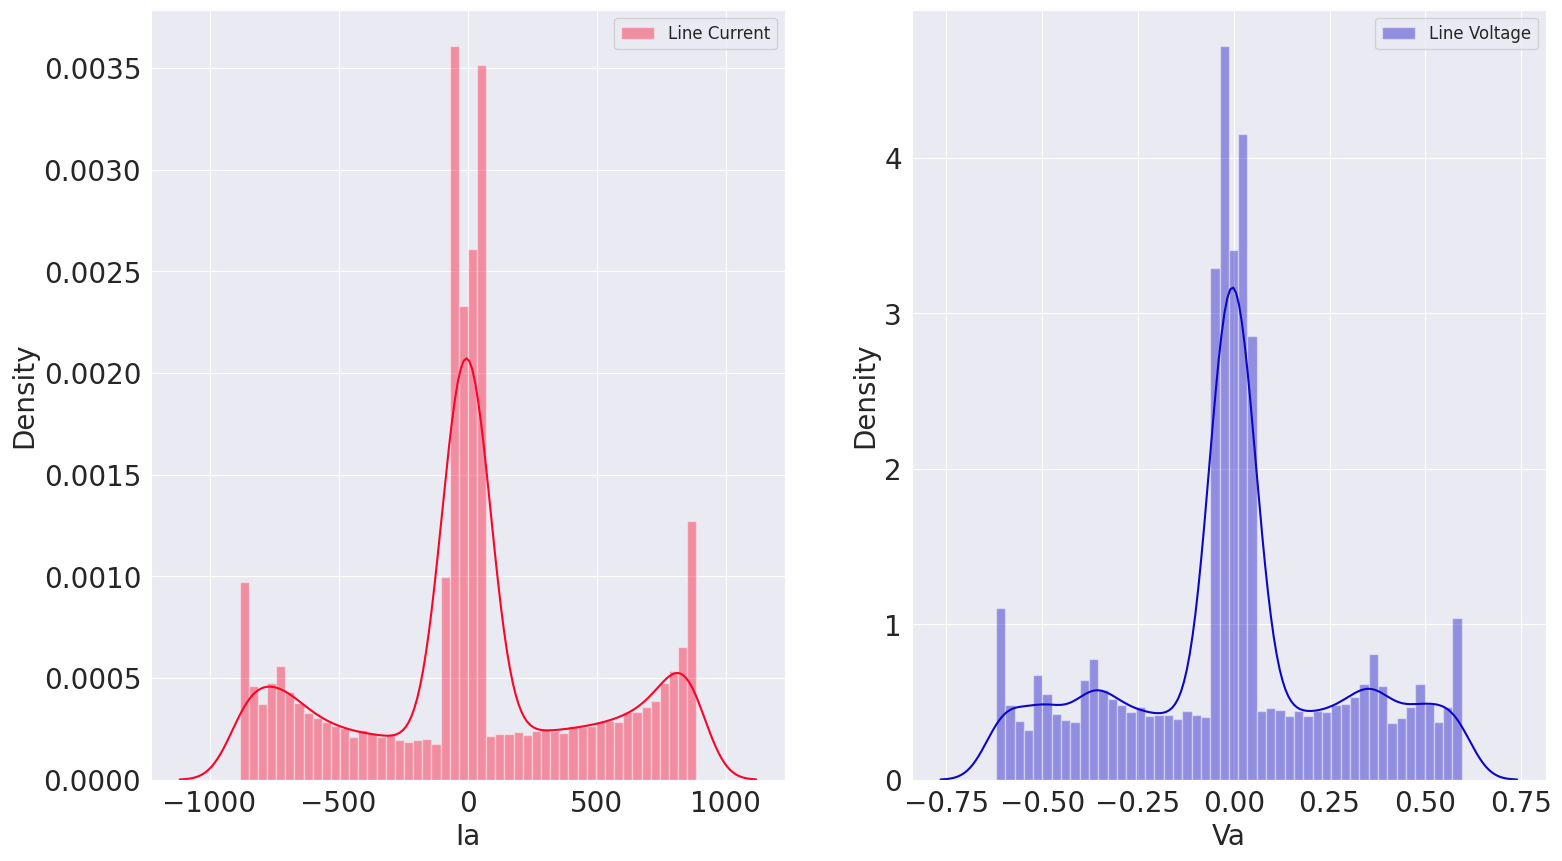

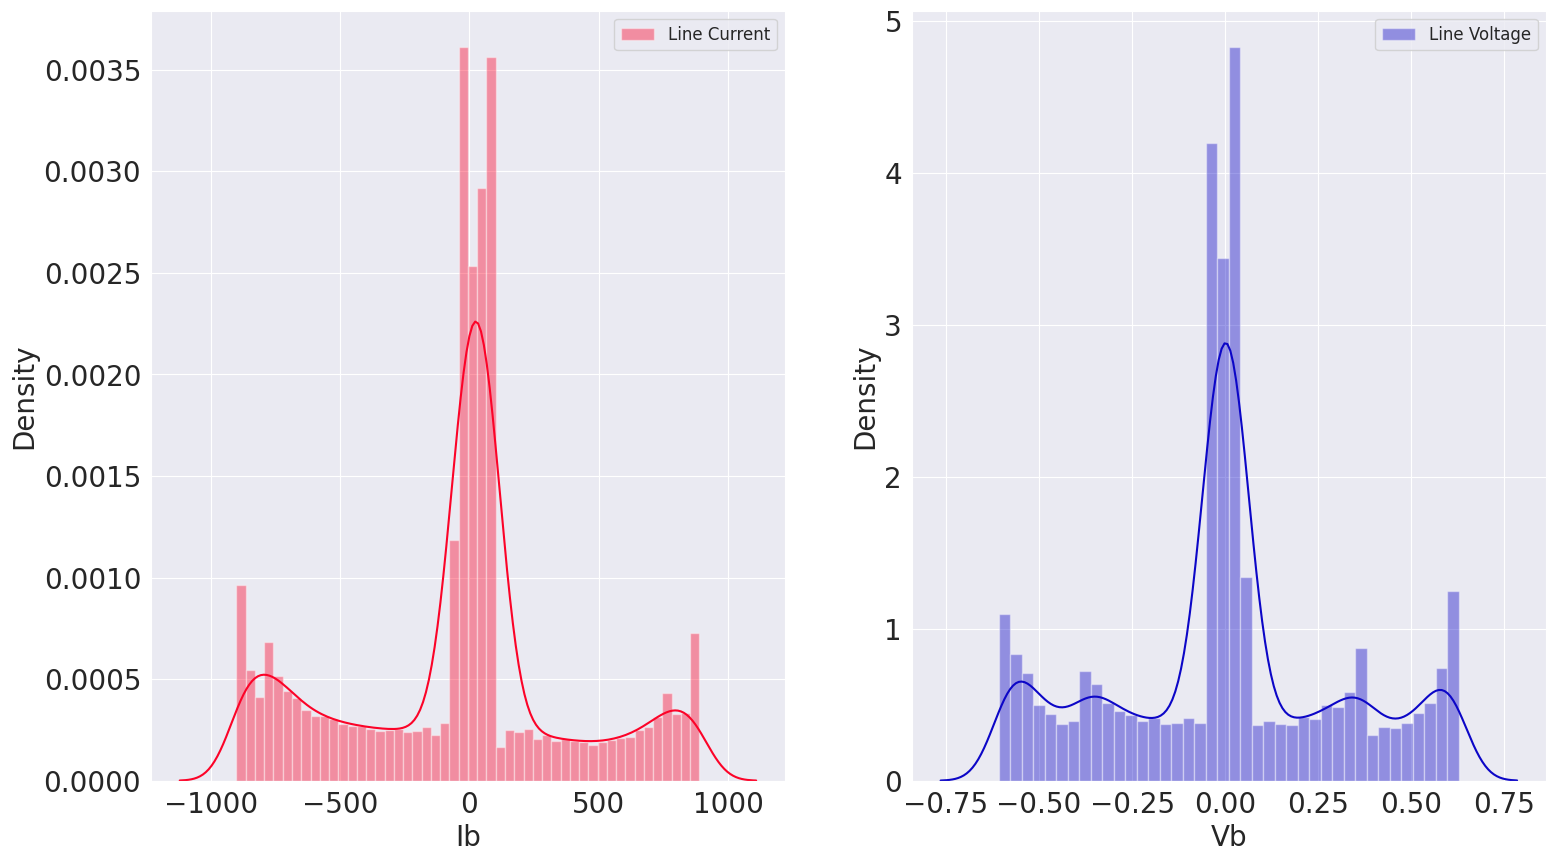

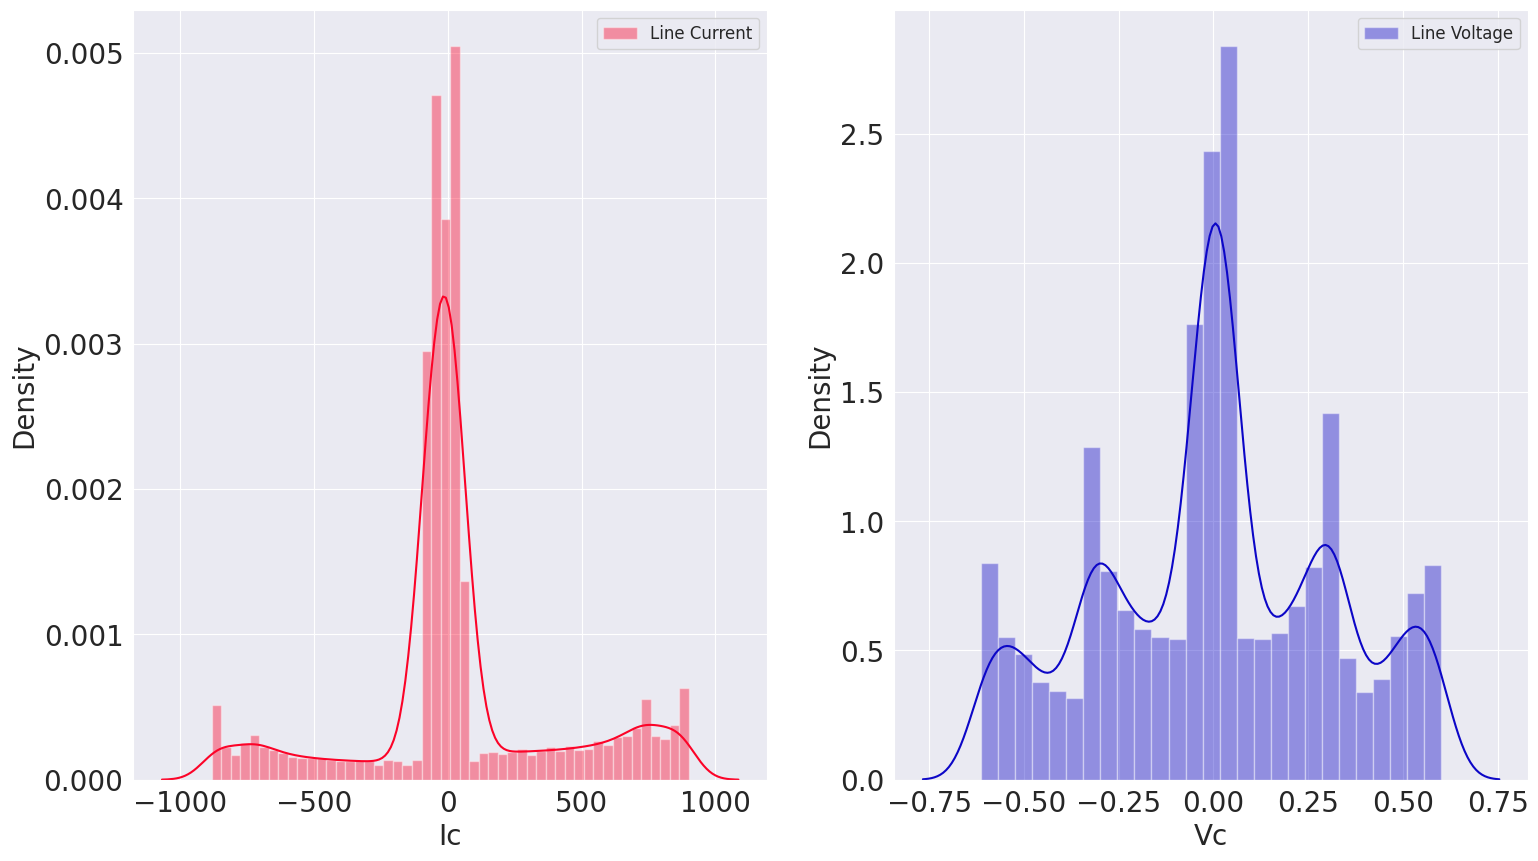

In [48]:
for cola, colb in lines:
    dist(cola,colb)
    print('\n')

In [49]:
multi_data['faultType'] = multi_data['G'].astype(str) + multi_data['C'].astype(str) + multi_data['B'].astype(str) + multi_data['A'].astype(str)
multi_data.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,faultType
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,1001
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,1001
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,1001
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,1001
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,1001


In [51]:
X = multi_data.drop(['G','C','B','A','faultType'], axis=1)
y = multi_data['faultType']

In [52]:
le = LabelEncoder()
y = le.fit_transform(y)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6288, 6), (1573, 6), (6288,), (1573,))

In [54]:
model_2 = RandomForestClassifier()
model_2.fit(X_train, y_train)
y_pred = model_2.predict(X_test)

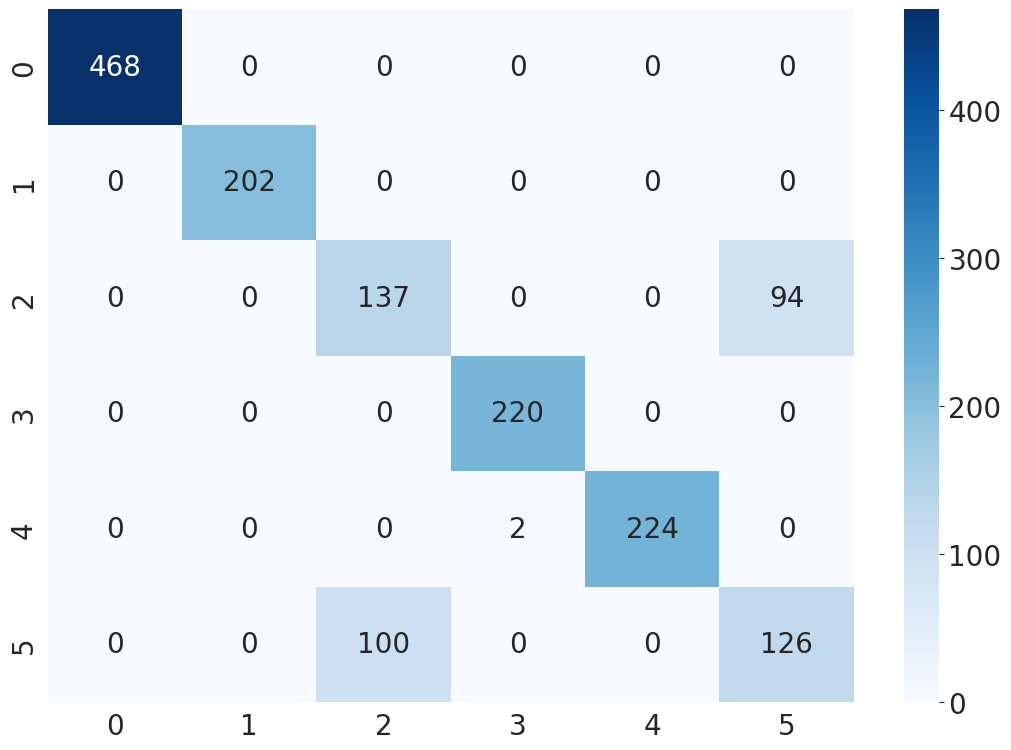

In [55]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='.4g')
plt.show()

In [56]:
print(f'Accuracy Score: {accuracy_score(y_test, y_pred)*100:.03f}%')

Accuracy Score: 87.540%


In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       468
           1       1.00      1.00      1.00       202
           2       0.58      0.59      0.59       231
           3       0.99      1.00      1.00       220
           4       1.00      0.99      1.00       226
           5       0.57      0.56      0.57       226

    accuracy                           0.88      1573
   macro avg       0.86      0.86      0.86      1573
weighted avg       0.88      0.88      0.88      1573



In [58]:
cr = classification_report(y_test, y_pred, output_dict=True)
cr.keys()

dict_keys(['0', '1', '2', '3', '4', '5', 'accuracy', 'macro avg', 'weighted avg'])

In [59]:
f1_scores = {}
for key, val in cr.items():
    if key == 'accuracy':
        break
    class_name = le.inverse_transform([int(key)])[0]
    f1_scores[class_name] = val["f1-score"]
sorted(f1_scores.items(), key=lambda x: x[1], reverse=True)

[('0000', 1.0),
 ('0110', 1.0),
 ('1011', 0.9955555555555555),
 ('1001', 0.9954751131221719),
 ('0111', 0.5854700854700855),
 ('1111', 0.5650224215246638)]

In [60]:
f1_scores_df = pd.DataFrame({'class': f1_scores.keys(),
                             'f1': f1_scores.values()})
f1_scores_df

,class,f1
0,0000,1.000000
1,0110,1.000000
2,0111,0.585470
3,1001,0.995475
4,1011,0.995556
5,1111,0.565022


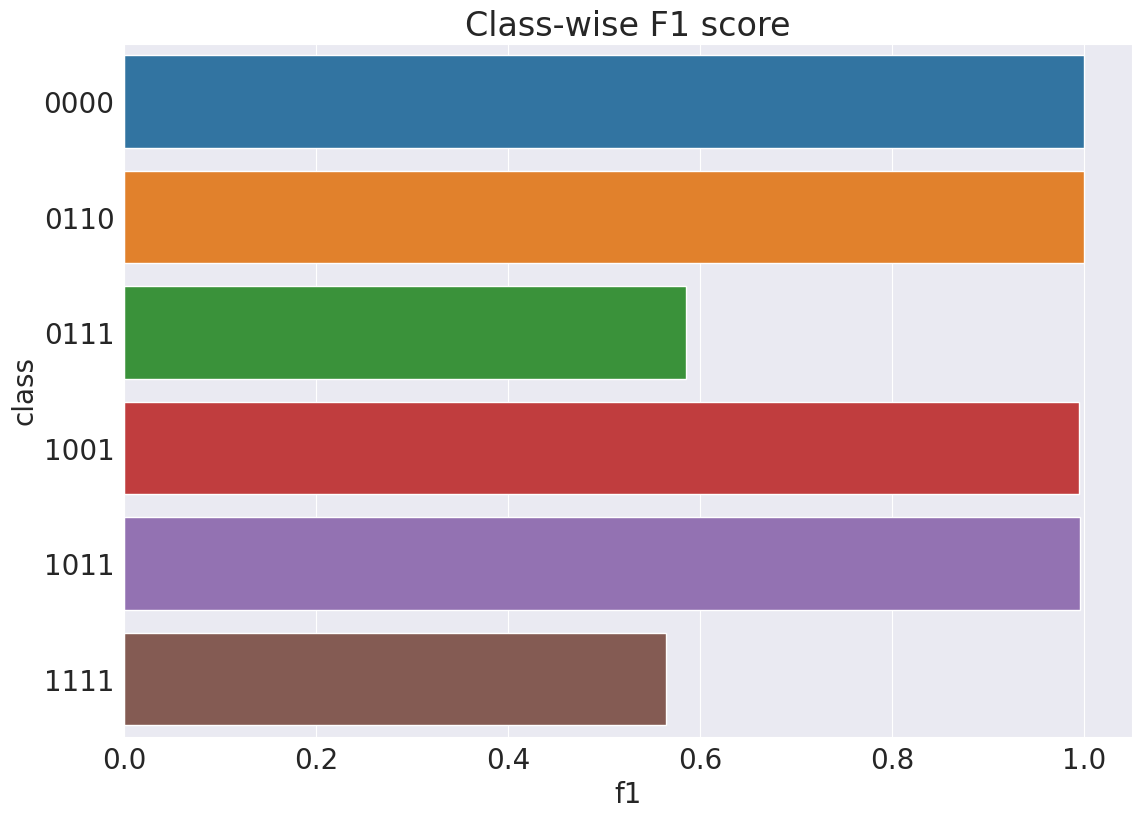

In [61]:
sns.barplot(data=f1_scores_df, x='f1', y='class')
plt.title("Class-wise F1 score")
plt.show()
